In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

In [37]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:

- RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
- CustomerId — идентификатор клиента
- Surname — фамилия клиента
- CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
- Geography — страна клиента (банк международный)
- Gender — пол клиента
- Age — возраст клиента
- Tenure — сколько лет клиент пользуется услугами банка
- Balance — баланс на счетах клиента в банке
- NumOfProducts — количество услуг банка, которые приобрёл клиент
- HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
- IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
- EstimatedSalary — предполагаемая заработная плата клиента
- Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

### ЗАДАНИЯ

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Подсказка
9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

### Задание 9.1.
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

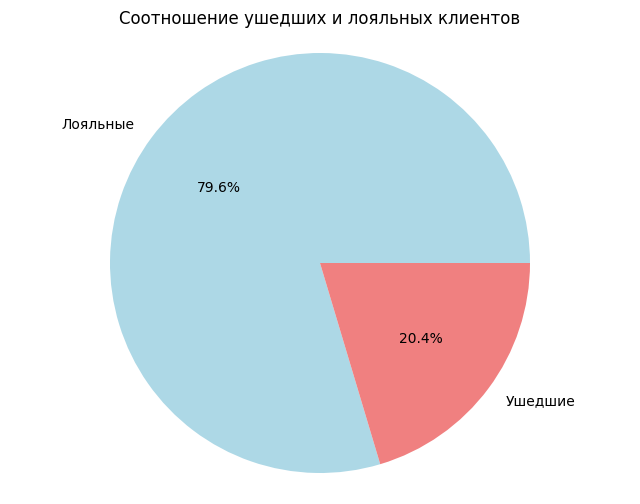

In [38]:
# Подсчет количества ушедших и лояльных клиентов
churn_counts = churn_data['Exited'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=['Лояльные', 'Ушедшие'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Соотношение ушедших и лояльных клиентов')
plt.axis('equal')  # Чтобы круг был кругом, а не овалом
plt.show()

### Комментарий по соотношению:
На графике видно что количество ушедших клиентов намного меньше количества лояльных клиентов. Это говорит о том, что в большенстве клиенты остаются лояльными банку. Однако, покинувшие банк клиенты все же составляют значительную часть от общего числа клиентов, исследование их является важным для разработки стратегии удержания клиентов.

### Задание 9.2. 
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

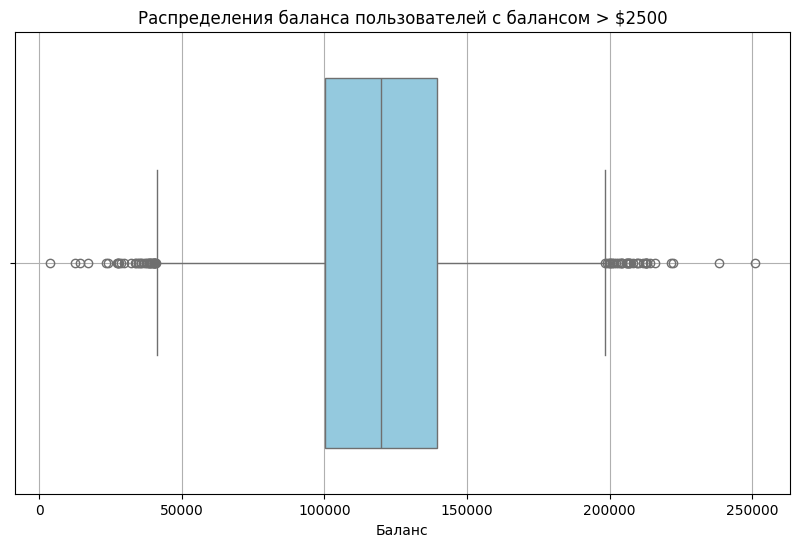

In [39]:
# Выборка данных с балансом больше 2,500 долларов

plt.figure(figsize=(10, 6))
sns.boxplot(x='Balance', data = churn_data[churn_data['Balance'] > 2500], color='skyblue')
plt.title('Распределения баланса пользователей с балансом > $2500')
plt.xlabel('Баланс')
plt.grid(True)
plt.show()



### Вывод:

Данное распределение баланса клиентов банка, у которых на счетах более 2,500 долларов, позволяет нам сделать следующие наблюдения:

- Основная часть клиентов имеет баланс на счетах в диапазоне от 100 до 140 тысяч долларов.
- Медианное значение баланса располагается примерно на уровне 120 тысяч долларов.
- На графике видны выбросы, выходящие за границы второго и третьего квартилей, что указывает на наличие клиентов с высокими балансами так и с низкими.
- Выбросы в основном сосредоточены у границ квартилей, что может указывать на наличие клиентов с очень высокими балансами, а также наличие некоторого количества клиентов с очень низкими балансами, которые также попадают в этот диапазон.
- Клиентов с балансом ниже 10 тысяч изчезающе мало.

Эти выводы могут быть полезны для понимания финансового состояния клиентов и разработки стратегий удержания, направленных на обслуживание клиентов с разными уровнями баланса на счетах.

### Задание 9.3.
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

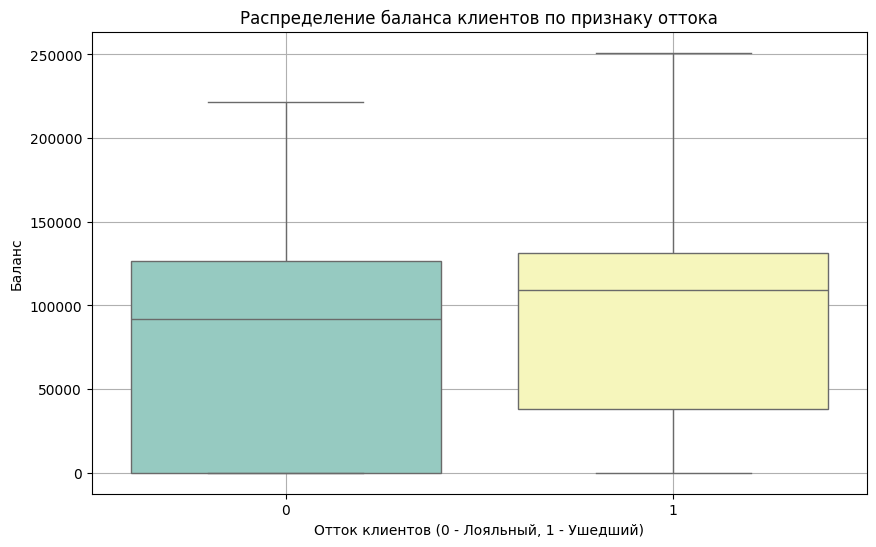

In [40]:
# Построение boxplot распределения баланса по признаку оттока
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', hue='Exited', y='Balance', data=churn_data, palette='Set3', legend=False)
plt.title('Распределение баланса клиентов по признаку оттока')
plt.xlabel('Отток клиентов (0 - Лояльный, 1 - Ушедший)')
plt.ylabel('Баланс')
plt.grid(True)
plt.show()

### Анализ и вывод:
Сравнение сумм на накопительных счетах лояльных и ушедших клиентов показывает, что в среднем ушедшие клиенты более состоятельные, нежели лояльные. Медиана лояльных клиентов расположена ниже 100-тысячной суммы на счете, а у ушедших выше. Так же можно заметить, что среди лояльной группы основная масса клиентов распологает сбережениями от 0 до 125 тысяч. Данные показатели наталкивают на мысль, что с улучшение благосостояния клиента услуги оказываемые банком перестают отвечать изменившимся требованием держателя счёта, что является возможной причиной ухода.

### Задание 9.4.
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

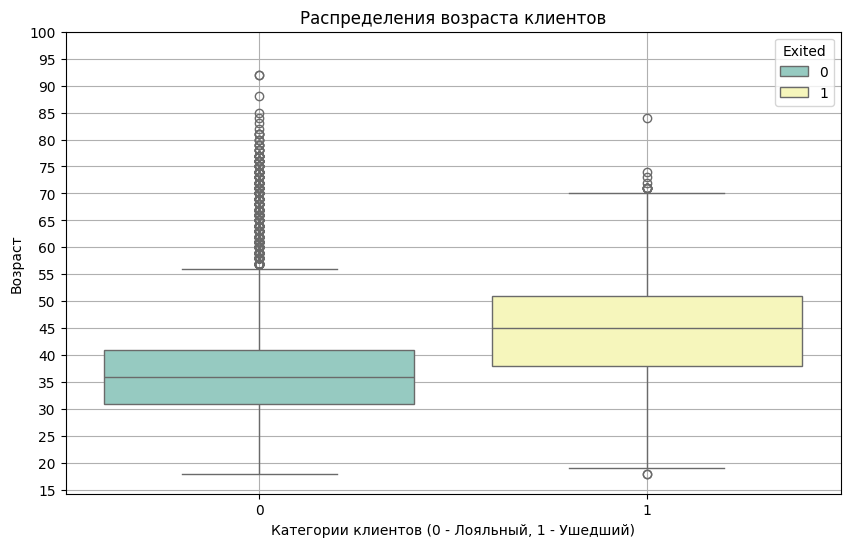

In [41]:
# Построение boxplot распределения возраста по признаку оттока
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', hue='Exited', y='Age', data=churn_data, palette='Set3')
plt.title('Распределения возраста клиентов')
plt.xlabel('Категории клиентов (0 - Лояльный, 1 - Ушедший)')
plt.ylabel('Возраст')
plt.yticks(ticks=range(15, 101, 5))  # Используем интервалы возраста по 5 лет
plt.grid(True)
plt.show()


### Анализ и вывод:
Возростное распределение среди лояльных клиентов распологается в промежутке от 18 до 56 лет, с медианным возрастов в 36 лет и основным процентом клиентов в возрасте 31 до 41 года. Следует обратить внимание что в этой группе находится наибольшее количество потенциальных выбросов, чьи значения привышают метку в 56 лет и почти равномерно распределины до отметки в 93 года.

В группе ушедших клиентов возростная категория клиентов в целом старше чем в лояльной группе. В этой категории значительно меньше потенциальных выбросов, что не выбивается из общей картины. Основной процент клиетов в возрасте от 38 до 51 года с медианой на отметке в 45 лет. Именно эта возрастная категория клиентов подлежит более подробному изучению.

### Задание 9.5. 
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

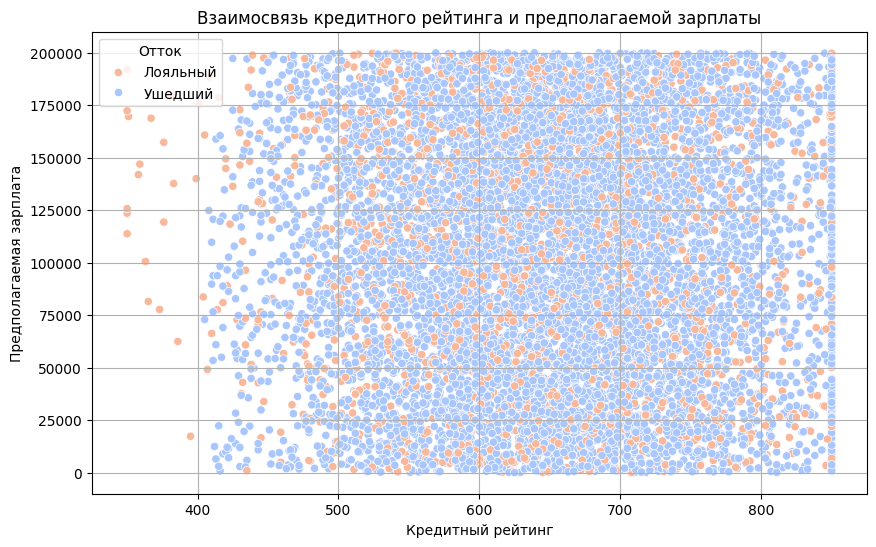

In [42]:
# Построение scatter plot для взаимосвязи кредитного рейтинга и предполагаемой зарплаты
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CreditScore', y='EstimatedSalary', data=churn_data, hue='Exited', palette='coolwarm')
plt.title('Взаимосвязь кредитного рейтинга и предполагаемой зарплаты')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Предполагаемая зарплата')
plt.legend(title='Отток', labels=['Лояльный', 'Ушедший'])
plt.grid(True)
plt.show()


На совмещенном графике не прослеживается четкая зваимосвязь между признаками "предполагаемой зарплаты" и "кредитным ретингом. Попробуем разделить группы на два раздельных графика.

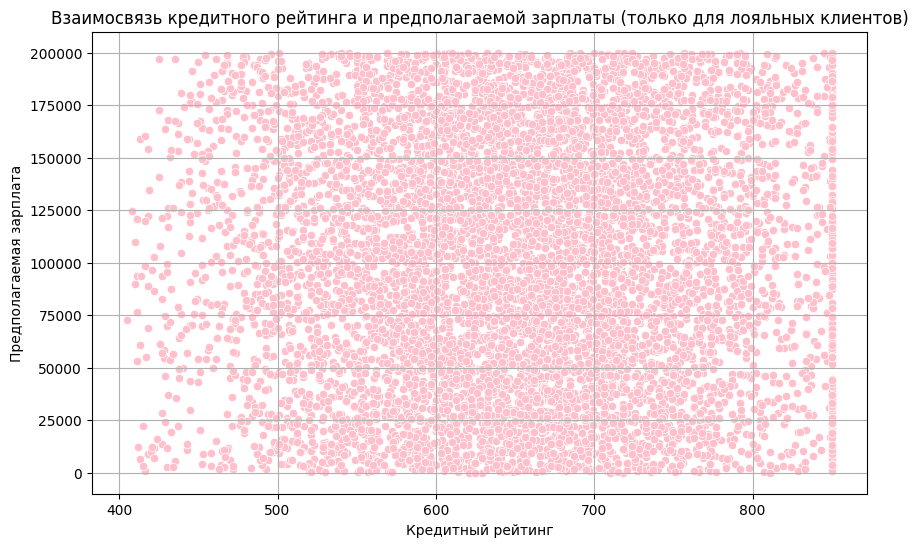

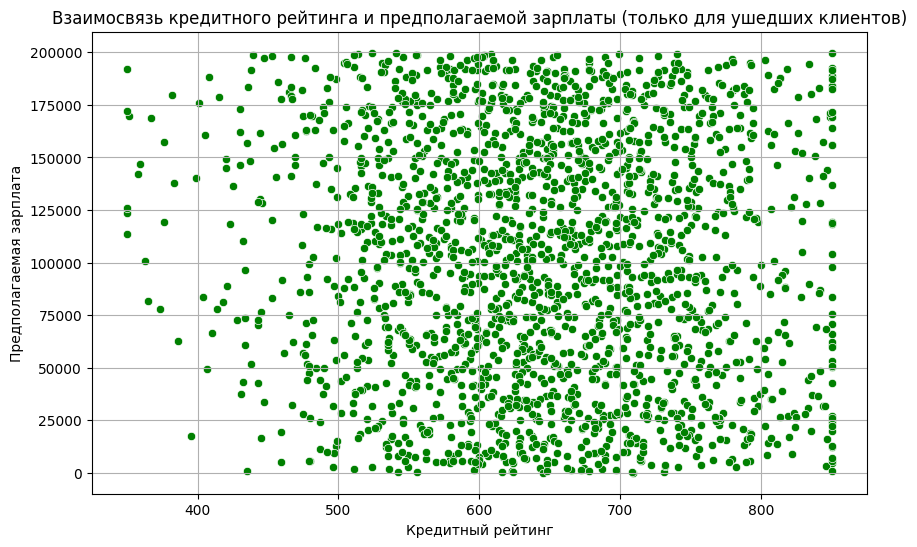

In [43]:
# Создание DataFrame только с лояльными клиентами
loyal_customers = churn_data[churn_data['Exited'] == 0]

# Построение scatter plot для взаимосвязи кредитного рейтинга и предполагаемой зарплаты только для лояльных клиентов
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CreditScore', y='EstimatedSalary', data=loyal_customers, color='pink')
plt.title('Взаимосвязь кредитного рейтинга и предполагаемой зарплаты (только для лояльных клиентов)')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Предполагаемая зарплата')
plt.grid(True)
plt.show()

# Создание DataFrame только с лояльными клиентами
unloyal_customers = churn_data[churn_data['Exited'] == 1]

# Построение scatter plot для взаимосвязи кредитного рейтинга и предполагаемой зарплаты только для лояльных клиентов
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CreditScore', y='EstimatedSalary', data=unloyal_customers, color='green')
plt.title('Взаимосвязь кредитного рейтинга и предполагаемой зарплаты (только для ушедших клиентов)')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Предполагаемая зарплата')
plt.grid(True)
plt.show()


### Вывод:
За исключение небольной группы клиентов с кредитным рейтингом ниже 400 в группе ушедших различий в графиках не наблюдается. Четких взаимосвязей между предполагаемой зарплатой и кредитным рейтингом не прослеживается.

### Задание 9.6. 
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [44]:
# Вычисление процента ушедших клиентов для каждого пола
churn_by_gender_percent = churn_data.groupby('Gender')['Exited'].mean() * 100

# Создание DataFrame с данными для Plotly Express
churn_by_gender_percent_df = churn_by_gender_percent.reset_index(name='Проценты')

# Построение столбчатой диаграммы с помощью Plotly Express
fig = px.bar(churn_by_gender_percent_df, x='Gender', y='Проценты',
             title='Процент ушедших клиентов по полу',
             color='Gender',
             color_discrete_sequence=px.colors.qualitative.Set2)

# Отображение графика
fig.show()

### Вывод:
Женщины отказываются от услуг банка чаще чем мужчины. Среди женщин процент ушедших составляет 25%, а среди мужчин только 17%. 1/4 часть клиентов женского пола отказывается от услуг банка. На это следует обратить внимание.

### Задание 9.7.
Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

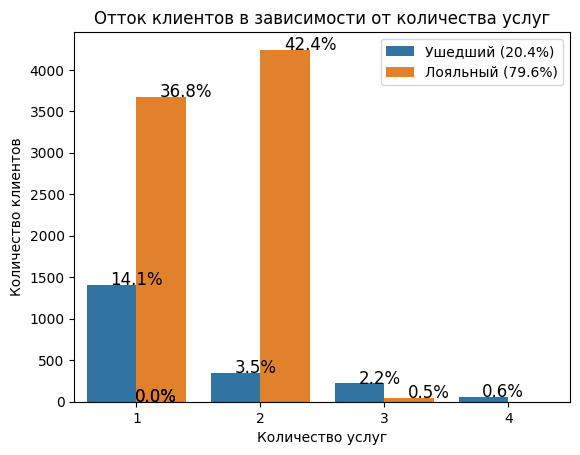

In [45]:
# Создание копии данных
churn_data_copy = churn_data.copy()

# Преобразование столбца 'Exited' в категориальный для лучшей визуализации
churn_data_copy['Exited'] = churn_data_copy['Exited'].map({0: 'Loyal', 1: 'Churned'})

# Создание countplot с 'NumOfProducts' на оси x и hue как 'Exited'
sns_plot = sns.countplot(x='NumOfProducts', hue='Exited', data=churn_data_copy)

# Установка заголовка и меток
plt.title('Отток клиентов в зависимости от количества услуг')
plt.xlabel('Количество услуг')
plt.ylabel('Количество клиентов')

# Расчет процентов лояльных и ушедших клиентов
total = len(churn_data_copy)
churned = len(churn_data_copy[churn_data_copy['Exited'] == 'Churned'])
loyal = len(churn_data_copy[churn_data_copy['Exited'] == 'Loyal'])
churned_percentage = '{:.1f}%'.format(100 * churned / total)
loyal_percentage = '{:.1f}%'.format(100 * loyal / total)

# Добавление процентов в легенду
sns_plot.legend(title_fontsize='13', labels=['Ушедший (' + churned_percentage + ')', 'Лояльный (' + loyal_percentage + ')'])


# Расчет процентов и добавление их на график
total = len(churn_data_copy)
for p in sns_plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.01
    y = p.get_y() + p.get_height()
    sns_plot.annotate(percentage, (x, y), size = 12)
    
# Отображение графика
plt.show()

### Вывод:
Наибольший отток клиентов наблюдается в группе клиентов с одной преобретенной услугой: соотношение ушедших к оставшимся немного больше чем 1/3. Наименьшее соотношение ушедших к оставшимся наблюдается во второй группе с двумя преобретенными услугами: примерно 1/12. С увиличением количества услуг пропорция меняется на противоположную и лояльность резкопадает и сходит на нет в группе с четырьмя услугами. Стоит отметить, что третья и четвертая группы клиентов вместе составляют 3.3% от общего числа клиентов. Наибольший отток клиетов в колличественном соотношении наблюдается в первой группе с одной услугой, именно на нее и следует обратить внимание.

### Задание 9.8.
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

Text(0, 0.5, 'Количество клиентов')

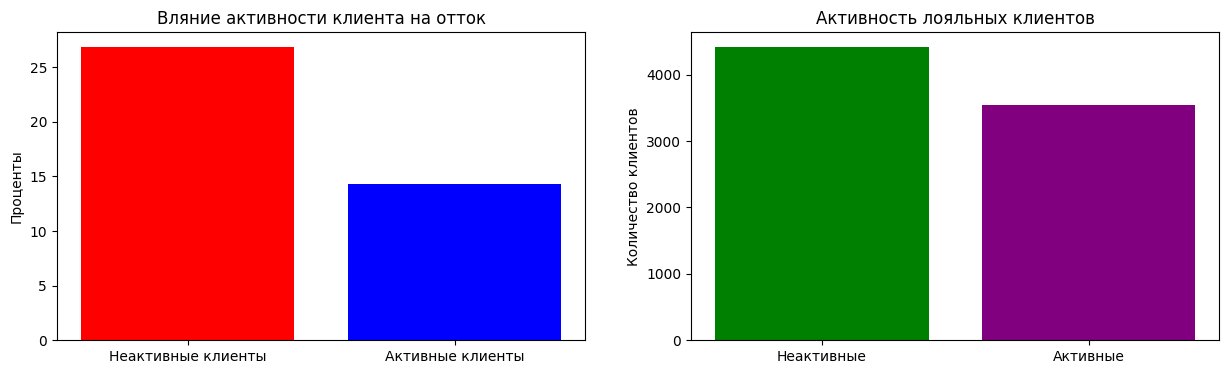

In [46]:
# Подсчет процента ушедших клиентов среди активных и неактивных клиентов
inactive_churn_rate = churn_data[churn_data['IsActiveMember'] == 0]['Exited'].mean() * 100
active_churn_rate = churn_data[churn_data['IsActiveMember'] == 1]['Exited'].mean() * 100

# Построение диаграммы
labels = ['Неактивные клиенты', 'Активные клиенты']
churn_rates = [inactive_churn_rate, active_churn_rate]
# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# диаграмма оттока активных и неактивных клиентов
axes[0].bar(labels, churn_rates, color=['red', 'blue'])
axes[0].set_title("Вляние активности клиента на отток")
axes[0].xaxis.set_tick_params(rotation=0)
axes[0].set_ylabel("Проценты")

# Диаграмма соотношения активных и неактивных клиентов
remaining_customers = churn_data[churn_data['Exited'] == 0]
activity_counts = remaining_customers['IsActiveMember'].value_counts()
axes[1].bar(['Неактивные', 'Активные'], activity_counts, color=['green', 'purple'])
axes[1].set_title("Активность лояльных клиентов")
axes[1].set_ylabel("Количество клиентов")

### Вывод:
В группе неактивных клиентов отток составляет около 27% от числа группы, тогда как в группе активных уровень оттока ниже 15%. Для наглядности был так же построен график активности среди лояльных клиентов, который показывает, что группы актиывных и неактивных клиентов примерно одного порядка.

#### Рекомендация:
Следует предпринять шаги направленные на повышение активности клиентов. Данные меры могут поспособствовать уменьшить отток клиентов в обеих группах.

### Задание 9.9.
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [47]:
# Сгруппируем данные по странам и подсчитаем сумму значений Exited для каждой страны
country_stats = churn_data.groupby('Geography').agg({'Exited': 'sum', 'CustomerId': 'count'}).reset_index()
country_stats.columns = ['Geography', 'Exited', 'TotalCustomers']

# Построение графика
fig = px.choropleth(
    data_frame=country_stats, 
    locations="Geography", 
    locationmode="country names", 
    color="Exited", 
    hover_name="Geography",
    hover_data={"Exited": True, "TotalCustomers": True},
    title='Отток клиентов по странам', 
    width=800, 
    height=500,
    color_continuous_scale='Reds',
    labels={'Exited': 'Ушло', 'TotalCustomers': 'Общее количество клиентов'}
)
# Получение уникальных значений столбца "Geography"
unique_countries = churn_data['Geography'].unique()
country_list = list(unique_countries)
countries_string = ', '.join(country_list)
# Добавление аннотации со списком стран
fig.add_annotation(
    x=0.5,
    y=-0.1,
    text=f"Страны: {countries_string}",
    showarrow=False,
    font=dict(
        size=15,
        color="black"
    )
)

# Отображение графика
fig.show()

### Анализ:
Банк работает в тре странах: Испания, Франция и Германия. Колличественный отток клиентов во Франции и Германии одинаков, однако во франции находится половина всех клиентов банка, тогда как Испания и Германия делят остальную часть клиентов примерно поровну. 

Опираясь на данные из задания 9.3. и картограмму можно предположить, что на отток клиентов в Германии повлияла сложившаяся экономическая ситуация в последние годы (информация за какой период были собраны данные отсутствует). Ушедшие клиенты в среднем более благосостоятельные чем оставшиеся, это наталкивает на мысль об иммиграции или переводе средств в регион с более стабильной экономикой.

### Задание 9.10.
Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

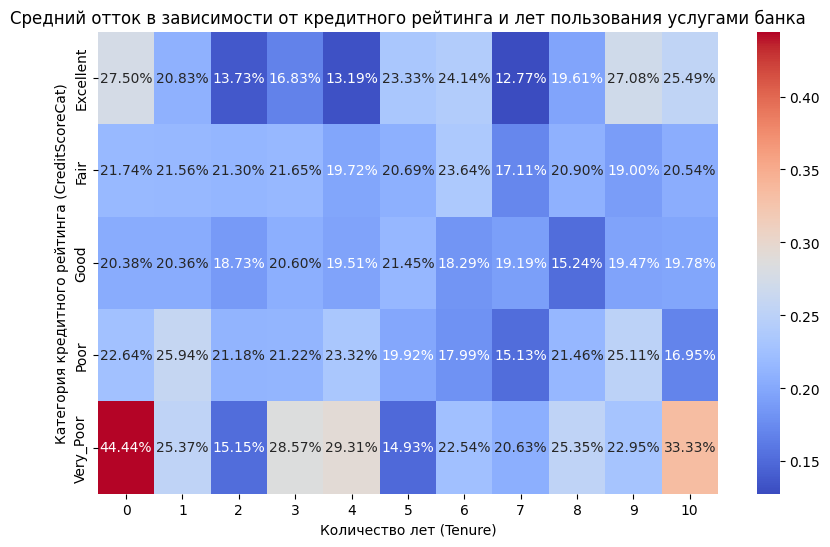

In [50]:
# Формируем новый признак.
# Функция для перевода числового признака в категориальный
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

# Применение функции к столбцу CreditScore
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

# Создание сводной таблицы
pivot_table = pd.pivot_table(churn_data, values='Exited', index='CreditScoreCat', columns='Tenure', aggfunc='mean')

# Построение тепловой карты с аннотацией

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2%", cmap="coolwarm")
plt.title('Средний отток в зависимости от кредитного рейтинга и лет пользования услугами банка')
plt.xlabel('Количество лет (Tenure)')
plt.ylabel('Категория кредитного рейтинга (CreditScoreCat)')
plt.show()

### Анализ тепловой карты: 
В среднем чаще всего банк покидают клиенты с категорией кредитного рейтинга Very_poor. В этой категории имеется 6 групп с высоким процентом ушедших клиентов чей процент оттока выше 25%: 0, 1, 3, 4, 8 и 10 лет пользования услуг банка. В категории Poor таких групп две: 1 год и 9 лет. В категориях Good и Fair такие группы отсутствуют. В категории Exellent три группы: 0, 9 и 10 лет.


### Примечание:

Помня о заданиях 9.3. и 9.4. построенная в задание 9.10. тепловая карта показалась странной и вводящей в заблуждение. Показания этой карты основываются на среднем значении от каждой группы каждой категории, что обманчиво, так как и категории и группы в них могут сильно отличаться по количеству клиентов, в связи с чем я посчитал целесообразным так же построить такую же тепловую карту, но уже с абсолютными значениями и посмотреть в каких же группах отток больше всего. Как оказалось, наивысший отток в группе с рейтингом Good, где большая часть значений расположена от 64 до 83 человек. В категориях Fair и Poor значения похожи и находятся примерно от 45 до 55 человек. Наименьший отток в группах Very_poor и Exellent, где только одно значение поднимается выше 20 человек. 

Низкие абсолютные значения оттока и высокие средние значения оттока в категории Very_poor говорят о том, что в целом в этой категории не очень много клиентов и приток в нее небольшой. В то время как в категориях Poor, Good и Fair абсолютные значения оттока высоки, а процентуальные низкие. Так как основное количество клиентов находится как раз в категориях Poor, Good и Fair, банк должен разработать компании удержания клиентов нацеленные на эти категории, а также на привлечение новых клиентов среди которых будут преобладать данные кредитные рейтинги.

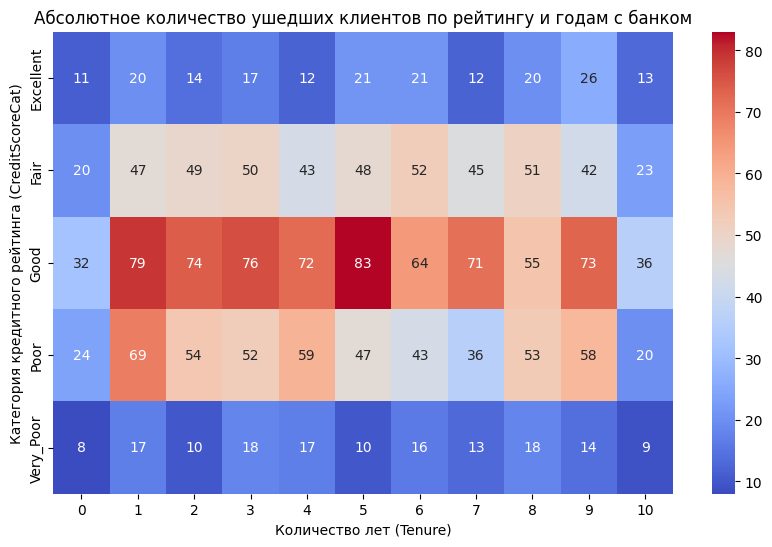

In [56]:
# Создание сводной таблицы с суммой ушедших клиентов
pivot_table_abs = pd.pivot_table(churn_data, values='Exited', index='CreditScoreCat', columns='Tenure', aggfunc='sum')

# Построение тепловой карты с аннотацией

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_abs, annot=True, fmt="d", cmap="coolwarm")
plt.title('Абсолютное количество ушедших клиентов по рейтингу и годам с банком')
plt.xlabel('Количество лет (Tenure)')
plt.ylabel('Категория кредитного рейтинга (CreditScoreCat)')
plt.show()